 ![](https://www.google.com/images/branding/googlelogo/1x/googlelogo_light_color_272x92dp.png)
___

# Capstone Google Project Advanced Data Analysis

***

## Project Description

If Salifort could predict whether an employee will leave the company, and discover the reasons behind their departure, they could better understand the problem and develop a solution. 

Next, the leadership team asks you to analyze the survey data and come up with ideas for how to increase employee retention. To help with this, they suggest you design a model that predicts whether an employee will leave the company based on their job title, department, number of projects, average monthly hours, and any other relevant data points. A good model will help the company increase retention and job satisfaction for current employees, and save money and time training new employees.

> Link to [Google Advanced Data Analytics Capstone by Google](https://www.coursera.org/learn/google-advanced-data-analytics-capstone/home/info)

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| satisfaction_level |	The employee’s self-reported satisfaction level [0-1]|
| last_evaluation|	Score of employee's last performance review [0-1]|
| number_project |	Number of projects employee contributes to |
| average_monthly_hours |	Average number of hours employee worked per month |
| time_spend_company | How long the employee has been with the company (years)	|
| work_accident | Whether or not the employee experienced an accident while at work	|
| promotion_last_5years | Whether or not the employee was promoted in the last 5 years	|
| department |	The employee's department |
| salary |	The employee's salary (low, medium, or high) |
| left | Whether or not the employee left the company |

## Data sources used

employee data collected by the Human Resources department of Salifort Motors

## Import Libraries

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

sns.set_style('dark')
sns.set(font_scale=2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings; warnings.filterwarnings('ignore')

pd.set_option('display.float_format','{:.2f}'.format)

## Exploratory Data Analysis

In [50]:
df = pd.read_csv("HR_capstone_dataset.csv")

In [51]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_monthly_hours  14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [53]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.00,NaN,NaN,NaN,0.61,0.25,0.09,0.44,0.64,0.82,1.00
last_evaluation,14999.00,NaN,NaN,NaN,0.72,0.17,0.36,0.56,0.72,0.87,1.00
number_project,14999.00,NaN,NaN,NaN,3.80,1.23,2.00,3.00,4.00,5.00,7.00
average_monthly_hours,14999.00,NaN,NaN,NaN,201.05,49.94,96.00,156.00,200.00,245.00,310.00
time_spend_company,14999.00,NaN,NaN,NaN,3.50,1.46,2.00,3.00,3.00,4.00,10.00
work_accident,14999.00,NaN,NaN,NaN,0.14,0.35,0.00,0.00,0.00,0.00,1.00
promotion_last_5years,14999.00,NaN,NaN,NaN,0.02,0.14,0.00,0.00,0.00,0.00,1.00
department,14999,10,sales,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,14999,3,low,7316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
left,14999.00,NaN,NaN,NaN,0.24,0.43,0.00,0.00,0.00,0.00,1.00


In [54]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'department', 'salary', 'left'],
      dtype='object')

### Groupby Function

In [55]:
df.groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years
left,,,,,,,
0,0.67,0.72,3.79,199.06,3.38,0.18,0.03
1,0.44,0.72,3.86,207.42,3.88,0.05,0.01


In [56]:
df.groupby("left").median()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years
left,,,,,,,
0,0.69,0.71,4.00,198.00,3.00,0.00,0.00
1,0.41,0.79,4.00,224.00,4.00,0.00,0.00


## Data Visualization

### Univariate Data Exploration

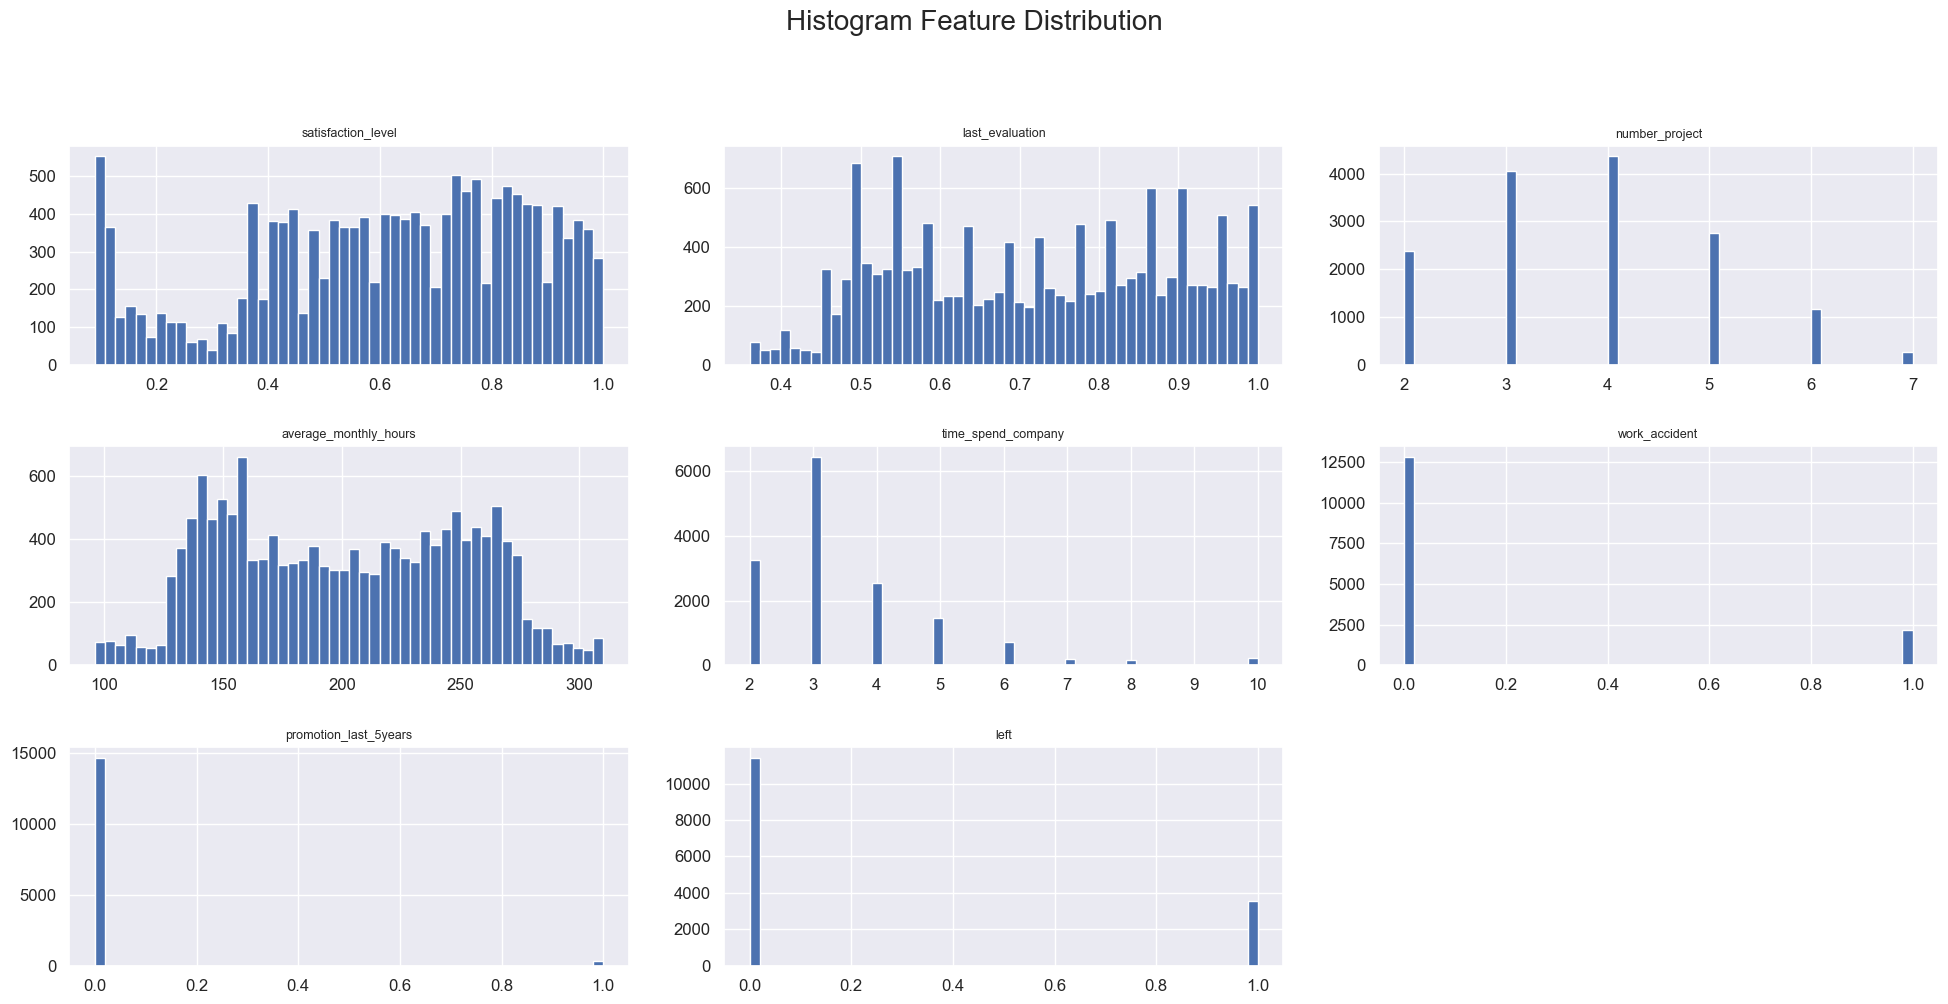

In [57]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

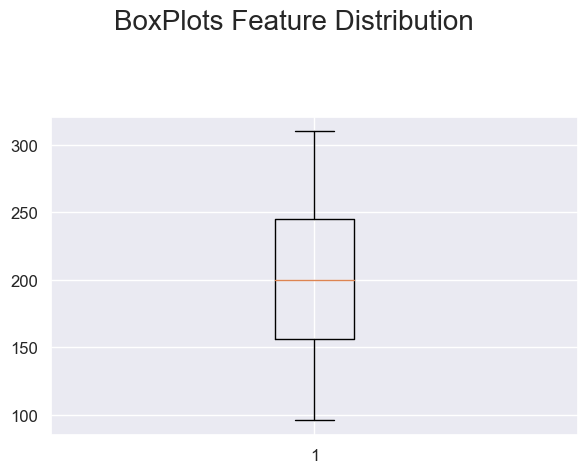

In [58]:
plt.boxplot(df['average_monthly_hours'])
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

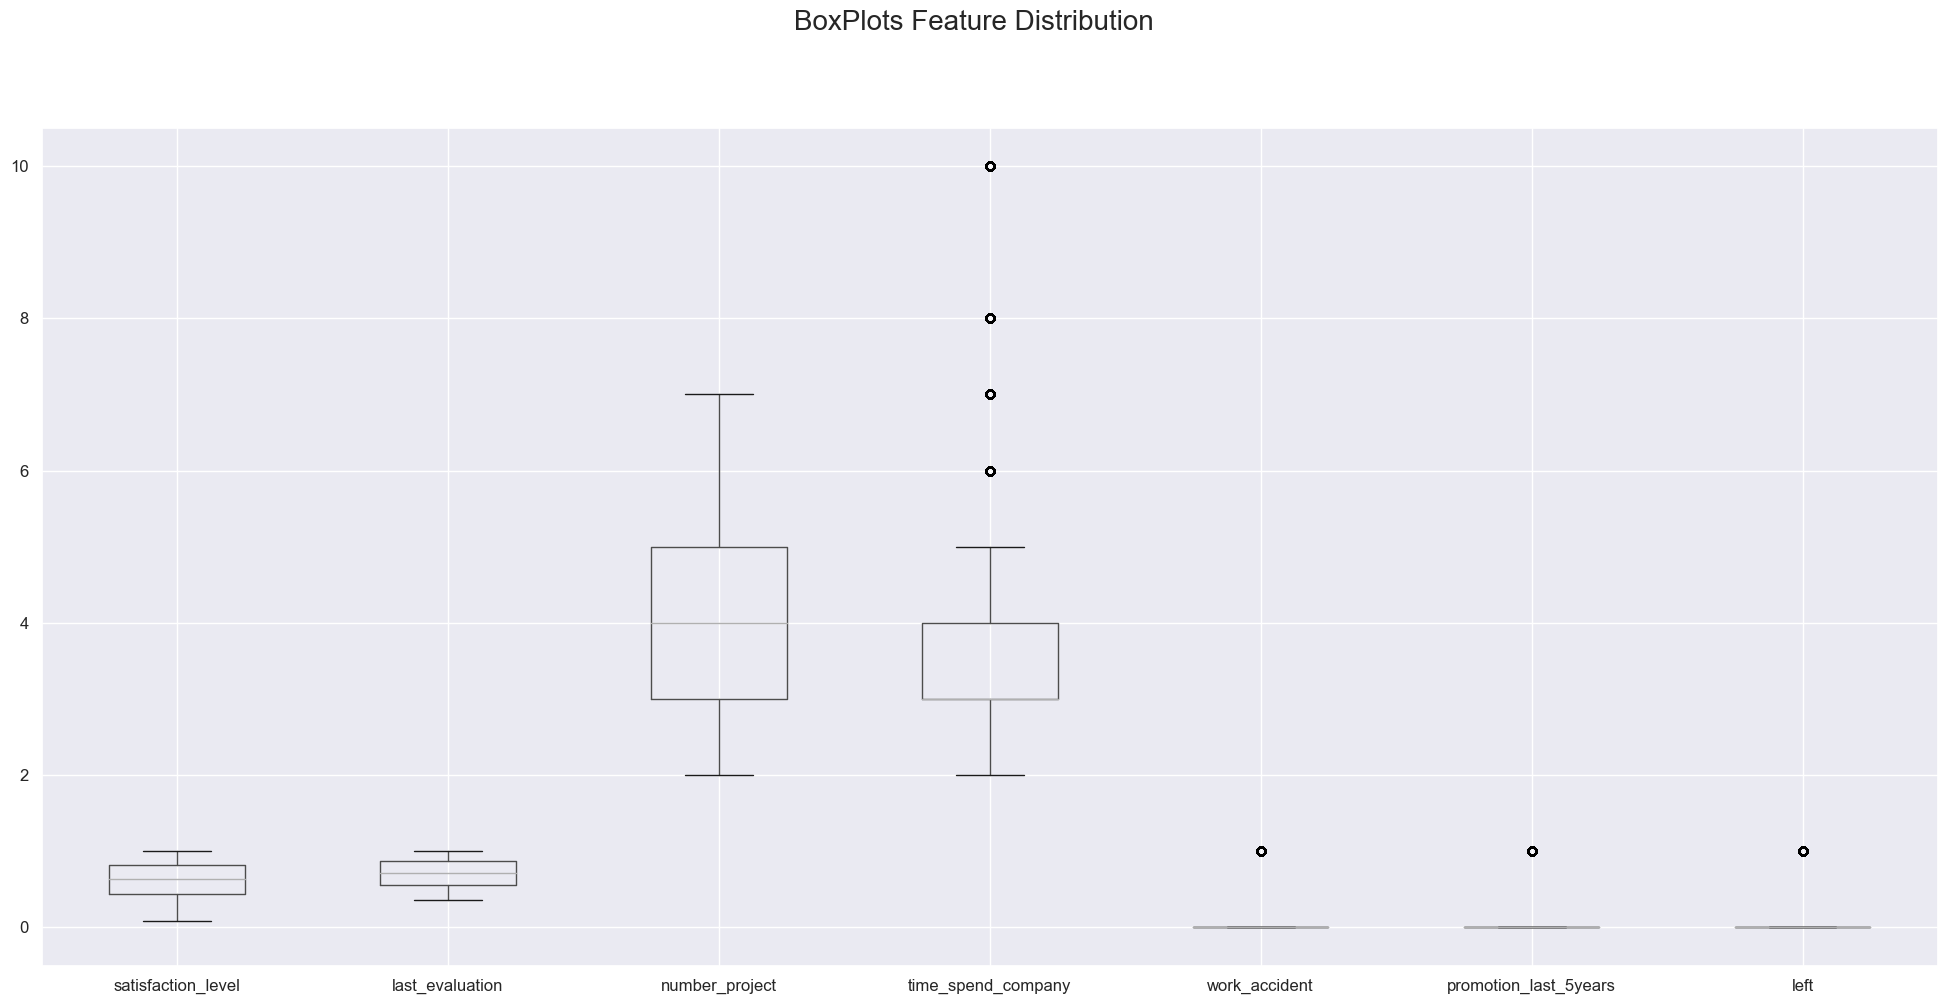

In [59]:
aux = df.drop(['average_monthly_hours'], axis=1)
aux.boxplot(figsize=(20,10))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()
del(aux)

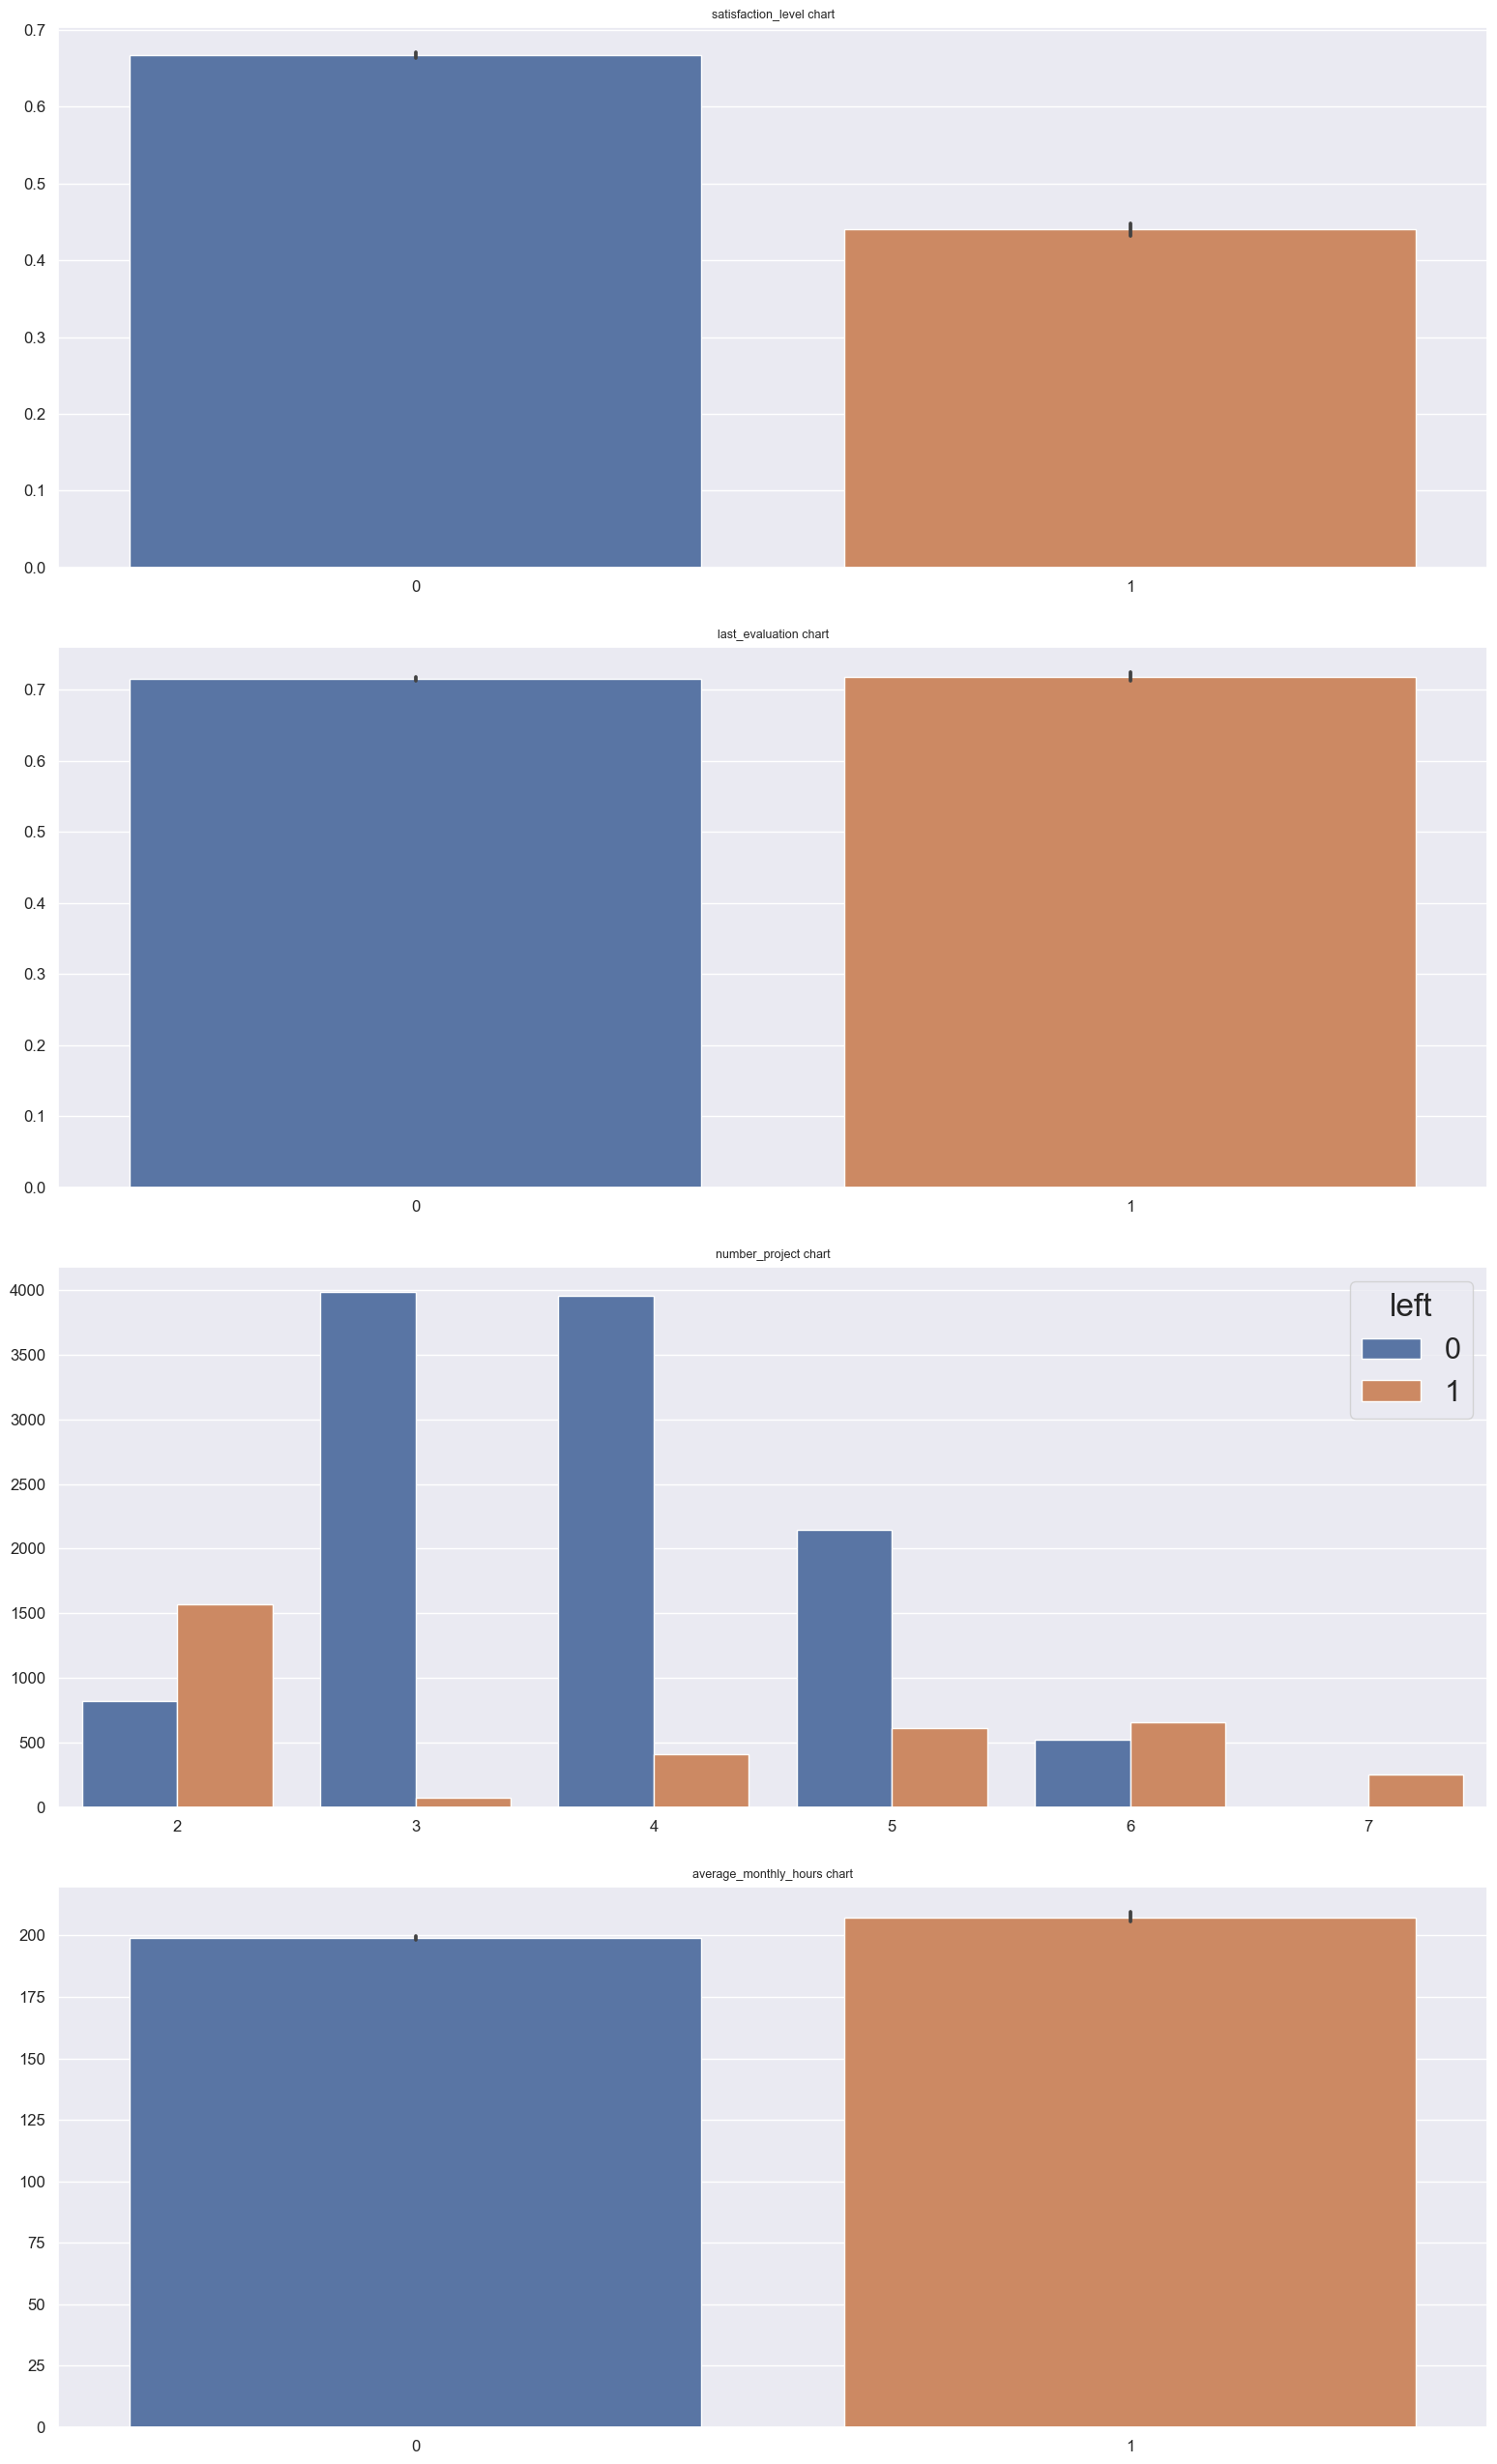

In [60]:
# Plot 4 rows and 1 column (can be expanded)

fig, ax = plt.subplots(4,1, sharex=False, figsize=(16,26))
#fig.suptitle('Main Title')


sns.barplot(x='left', y="satisfaction_level", data=df, ax=ax[0])
ax[0].set_title('satisfaction_level chart')
#ax[0].tick_params('x', labelrotation=45)
ax[0].set_xlabel("")
ax[0].set_ylabel("")

sns.barplot(x="left", y="last_evaluation", data=df, ax=ax[1])
ax[1].set_title('last_evaluation chart')
#ax[1].tick_params('x', labelrotation=45)
ax[1].set_xlabel("")
ax[1].set_ylabel("")

sns.countplot(x="number_project", hue="left", data=df, ax=ax[2])
ax[2].set_title('number_project chart')
#ax[2].tick_params('x', labelrotation=45)
ax[2].set_xlabel("")
ax[2].set_ylabel("")

sns.barplot(x="left", y="average_monthly_hours", data=df, ax=ax[3])
ax[3].set_title('average_monthly_hours chart')
#ax[3].tick_params('x', labelrotation=45)
ax[3].set_xlabel("")
ax[3].set_ylabel("")

plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

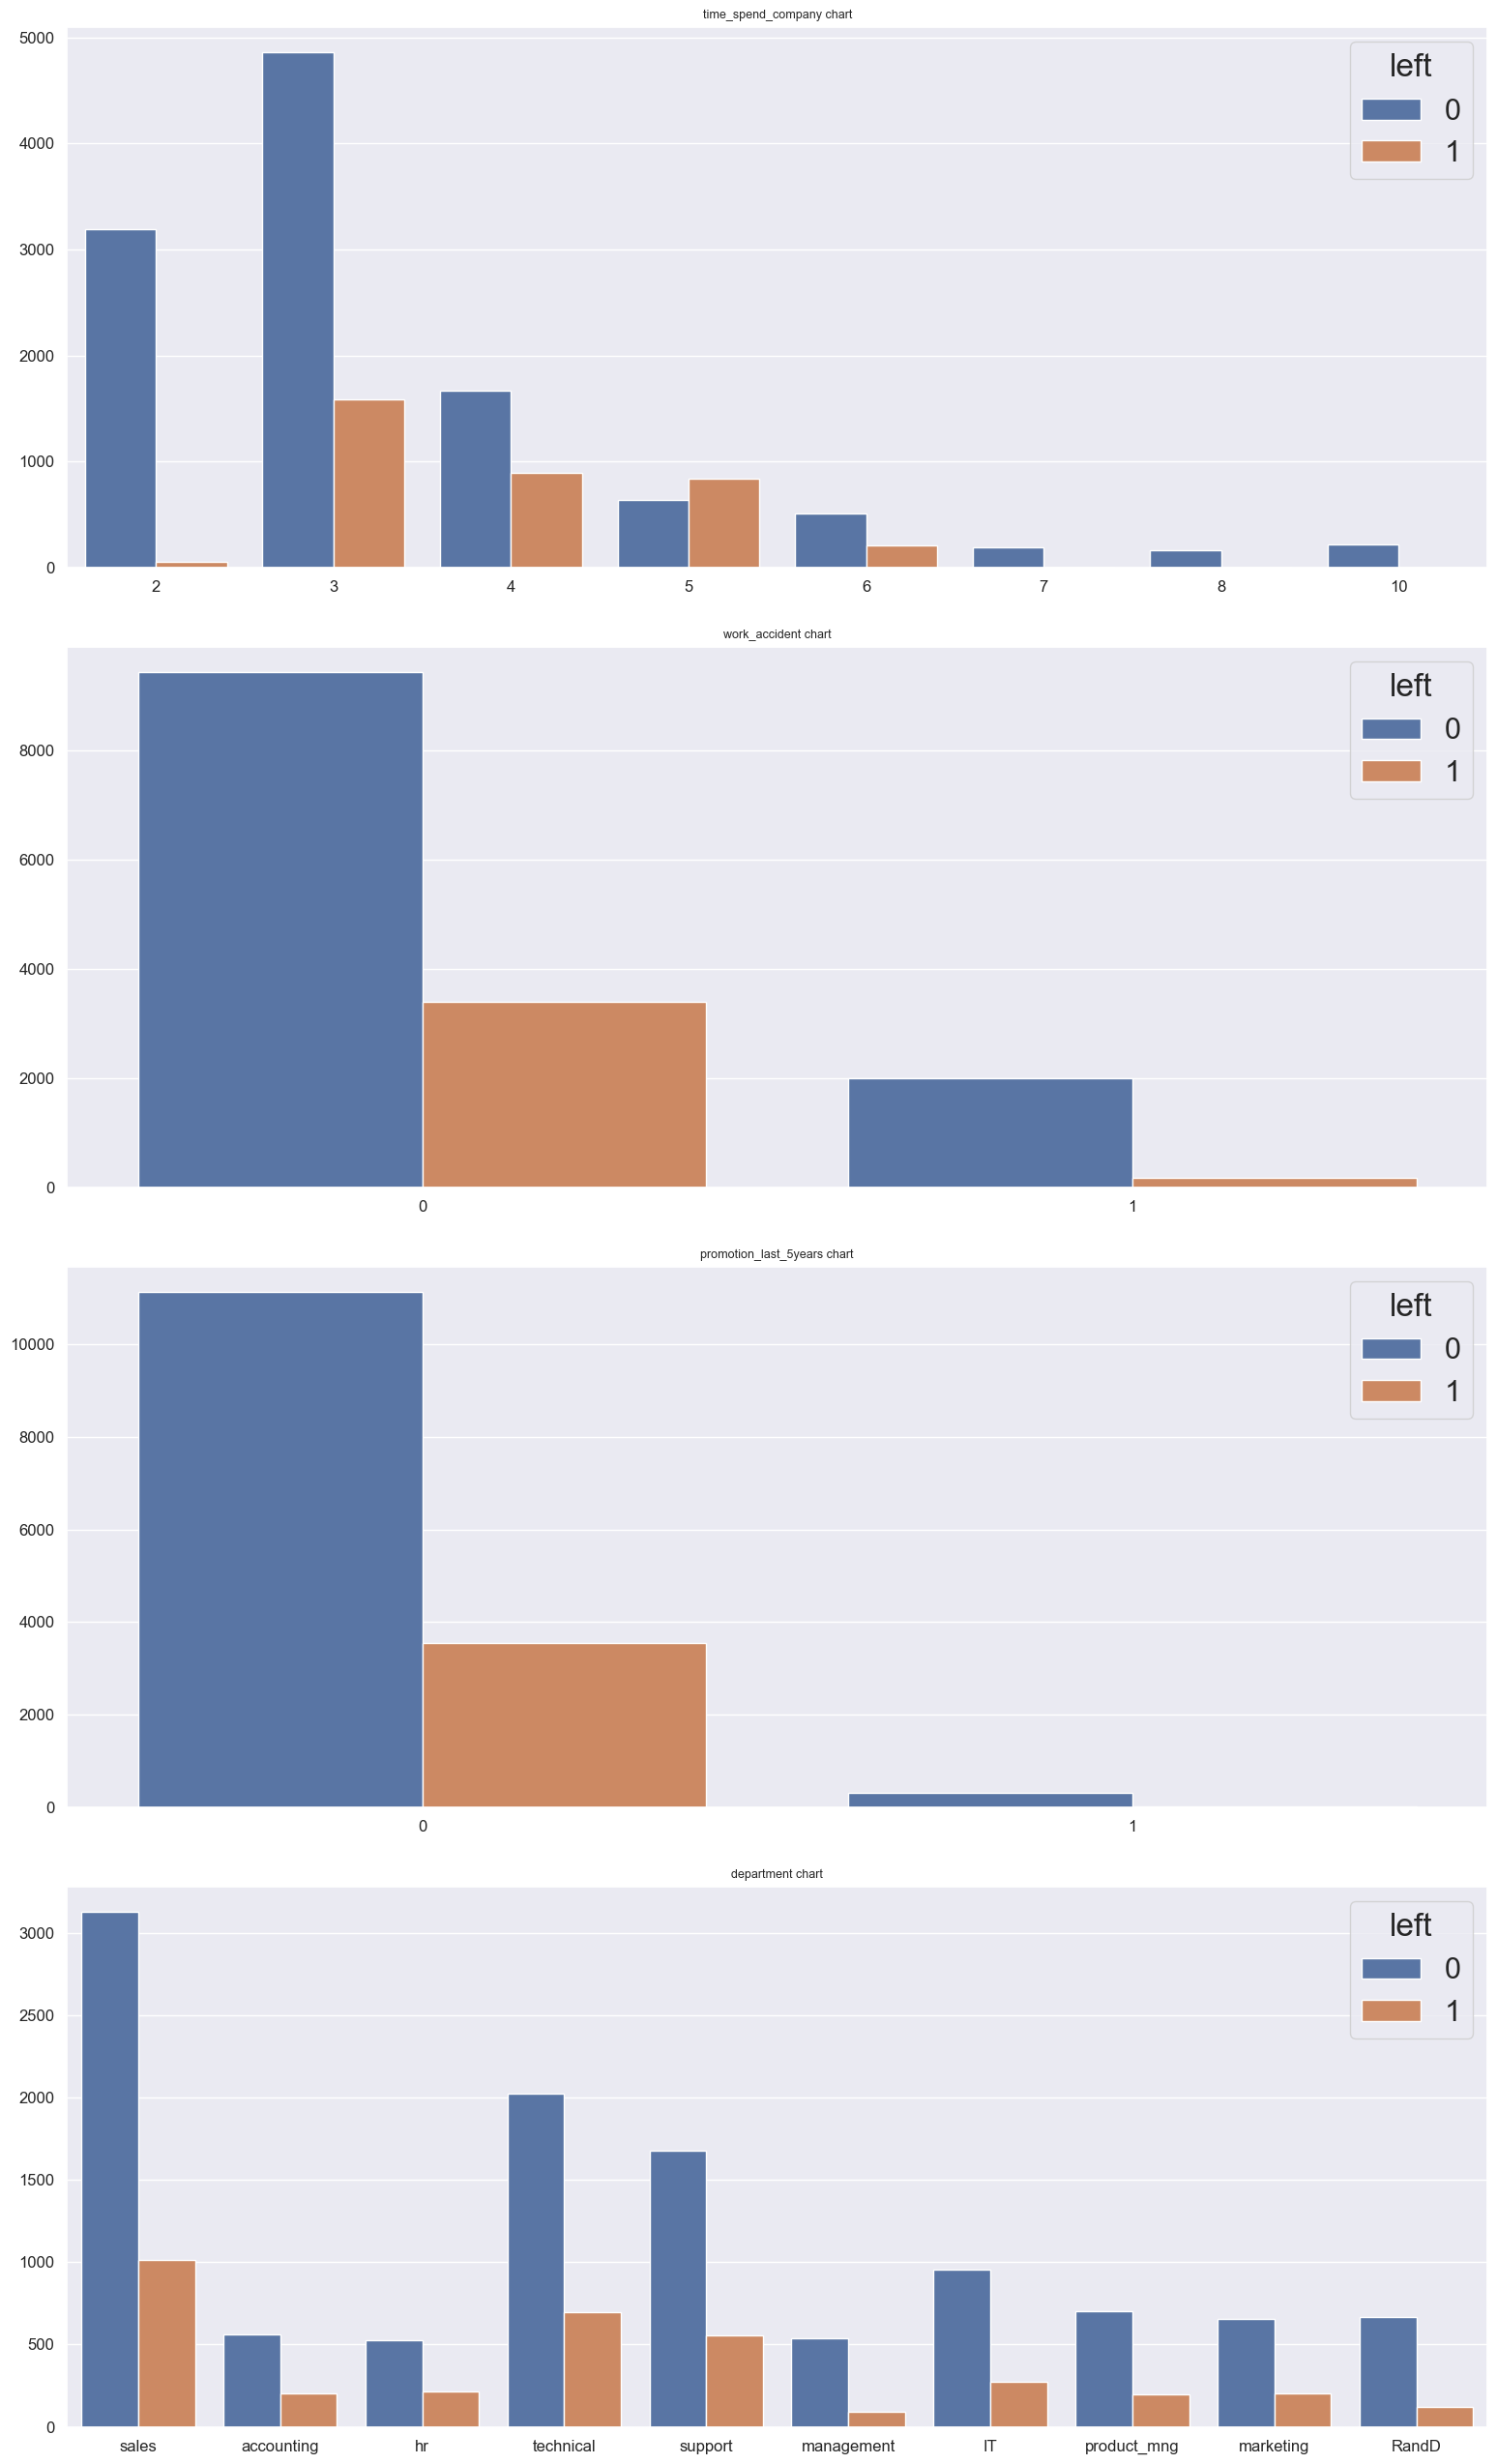

In [61]:
# Plot 4 rows and 1 column (can be expanded)

fig, ax = plt.subplots(4,1, sharex=False, figsize=(16,26))
#fig.suptitle('Main Title')


sns.countplot(hue='left', x="time_spend_company", data=df, ax=ax[0])
ax[0].set_title('time_spend_company chart')
#ax[0].tick_params('x', labelrotation=45)
ax[0].set_xlabel("")
ax[0].set_ylabel("")

sns.countplot(x="work_accident", hue="left", data=df, ax=ax[1])
ax[1].set_title('work_accident chart')
#ax[1].tick_params('x', labelrotation=45)
ax[1].set_xlabel("")
ax[1].set_ylabel("")

sns.countplot(hue="left", x="promotion_last_5years", data=df, ax=ax[2])
ax[2].set_title('promotion_last_5years chart')
#ax[2].tick_params('x', labelrotation=45)
ax[2].set_xlabel("")
ax[2].set_ylabel("")

sns.countplot(hue="left", x="department", data=df, ax=ax[3])
ax[3].set_title('department chart')
#ax[3].tick_params('x', labelrotation=45)
ax[3].set_xlabel("")
ax[3].set_ylabel("")

plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

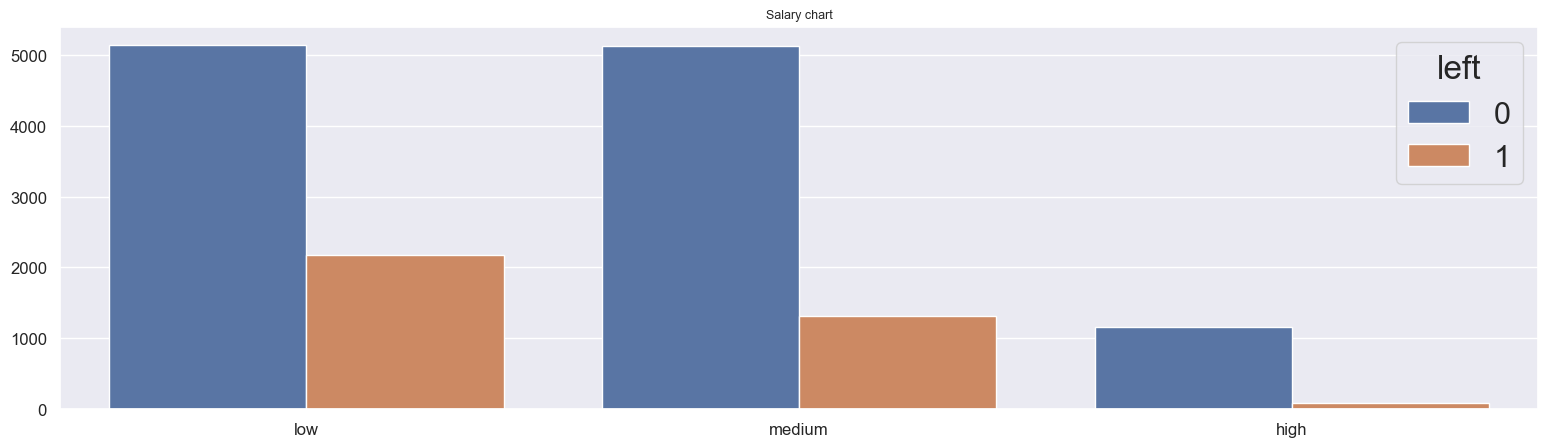

In [62]:
# Plot 1 rows and 2 columns (can be expanded)

fig, ax = plt.subplots(1,1, sharex=False, figsize=(16,5))
#fig.suptitle('Main Title')

sns.countplot(x='salary', data=df, hue="left")
ax.set_title('Salary chart')
#ax.tick_params('x', labelrotation=45)
ax.set_xlabel("")
ax.set_ylabel("")

plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

### Correlation

In [63]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,left
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,0.03,-0.39
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,-0.01,0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,-0.01,0.02
average_monthly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,-0.00,0.07
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.07,0.14
work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,0.04,-0.15
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,1.00,-0.06
left,-0.39,0.01,0.02,0.07,0.14,-0.15,-0.06,1.00


In [64]:
df.corr()["left"].sort_values()

satisfaction_level      -0.39
work_accident           -0.15
promotion_last_5years   -0.06
last_evaluation          0.01
number_project           0.02
average_monthly_hours    0.07
time_spend_company       0.14
left                     1.00
Name: left, dtype: float64

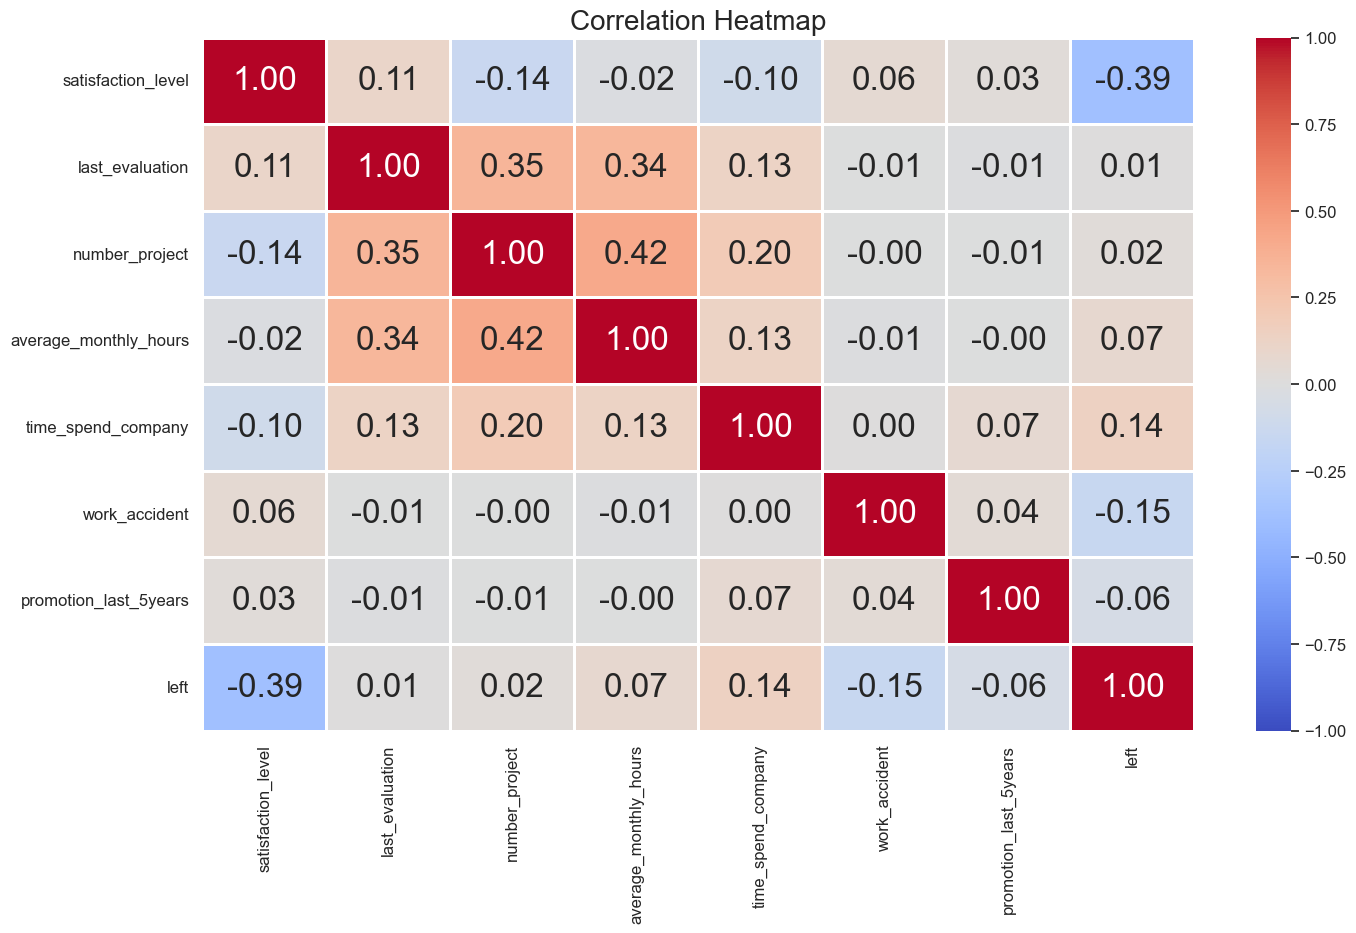

In [65]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True,fmt='.2f', linewidths=2, vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

## Data Preprocessing

### Feature Engineering

In [66]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


### Treat Missing Values

In [67]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
promotion_last_5years    0
department               0
salary                   0
left                     0
dtype: int64

### Treat Duplicate Values

In [68]:
df.duplicated(keep='first').sum()

3008

In [69]:
df[df.duplicated(keep=False)].head() #Check duplicate values

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [70]:
df.drop_duplicates(ignore_index=True, inplace=True)

In [71]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


### Type Change

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   promotion_last_5years  11991 non-null  int64  
 7   department             11991 non-null  object 
 8   salary                 11991 non-null  object 
 9   left                   11991 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 936.9+ KB


In [73]:
df["work_accident"] = df["work_accident"].astype('object')

In [74]:
df["promotion_last_5years"] = df["promotion_last_5years"].astype('object')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  object 
 6   promotion_last_5years  11991 non-null  object 
 7   department             11991 non-null  object 
 8   salary                 11991 non-null  object 
 9   left                   11991 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 936.9+ KB


### Dummies encoding

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  object 
 6   promotion_last_5years  11991 non-null  object 
 7   department             11991 non-null  object 
 8   salary                 11991 non-null  object 
 9   left                   11991 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 936.9+ KB


In [77]:
df2 = pd.get_dummies(data=df, drop_first=True)

In [78]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,left,work_accident_1,promotion_last_5years_1,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,1,0,0,0,0,0,0,0,0,1,0,0,1,0


### Save to CSV

In [82]:
df2.to_csv("HR.csv", index=False)

### Create Train, Validation/Test Dataset

In [83]:
df2.shape

(11991, 19)

In [84]:
X = df2.drop('left', axis=1)
y = df2['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [85]:
trainset = pd.concat([X_train, y_train], axis=1)

trainset.to_csv("HR_train.csv", index=False)

In [86]:
trainset

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident_1,promotion_last_5years_1,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,left
6417,0.86,0.56,5,141,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0
288,0.82,0.91,5,232,5,0,0,0,0,0,0,0,0,0,0,1,1,0,1
5042,0.62,0.52,3,148,3,0,0,0,0,0,0,0,0,1,0,0,0,1,0
11123,0.43,0.74,4,129,6,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3678,0.85,0.79,3,156,3,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,0.49,0.71,4,178,8,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5191,0.77,0.52,4,216,3,0,0,0,0,0,0,0,0,1,0,0,0,1,0
5390,0.84,0.53,5,190,3,0,0,0,0,0,0,0,0,0,0,1,0,1,0
860,0.43,0.48,2,144,3,0,0,0,0,0,0,0,0,1,0,0,1,0,1


In [87]:
testset = pd.concat([X_test, y_test], axis=1)

testset.to_csv("HR_test.csv", index=False)

In [88]:
testset

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident_1,promotion_last_5years_1,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,left
396,0.09,0.79,6,293,5,0,0,0,0,0,0,0,0,1,0,0,1,0,1
3098,0.74,0.96,4,154,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0
9322,0.81,0.97,4,212,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0
357,0.37,0.54,2,149,3,0,0,0,0,0,0,0,0,0,1,0,1,0,1
1323,0.10,0.77,6,272,4,0,0,0,1,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9313,0.70,0.74,3,212,3,0,0,0,0,0,0,0,0,1,0,0,1,0,0
10431,0.87,0.73,5,111,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3068,0.81,0.66,3,181,2,1,0,0,0,0,0,0,0,1,0,0,0,1,0
6104,0.70,0.98,4,146,3,0,0,0,0,0,0,1,0,0,0,0,1,0,0


## Classification Analysis

## Classification with XGBoost classifier

In [89]:
model = xgb.XGBClassifier(objective='binary:logistic')

In [90]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

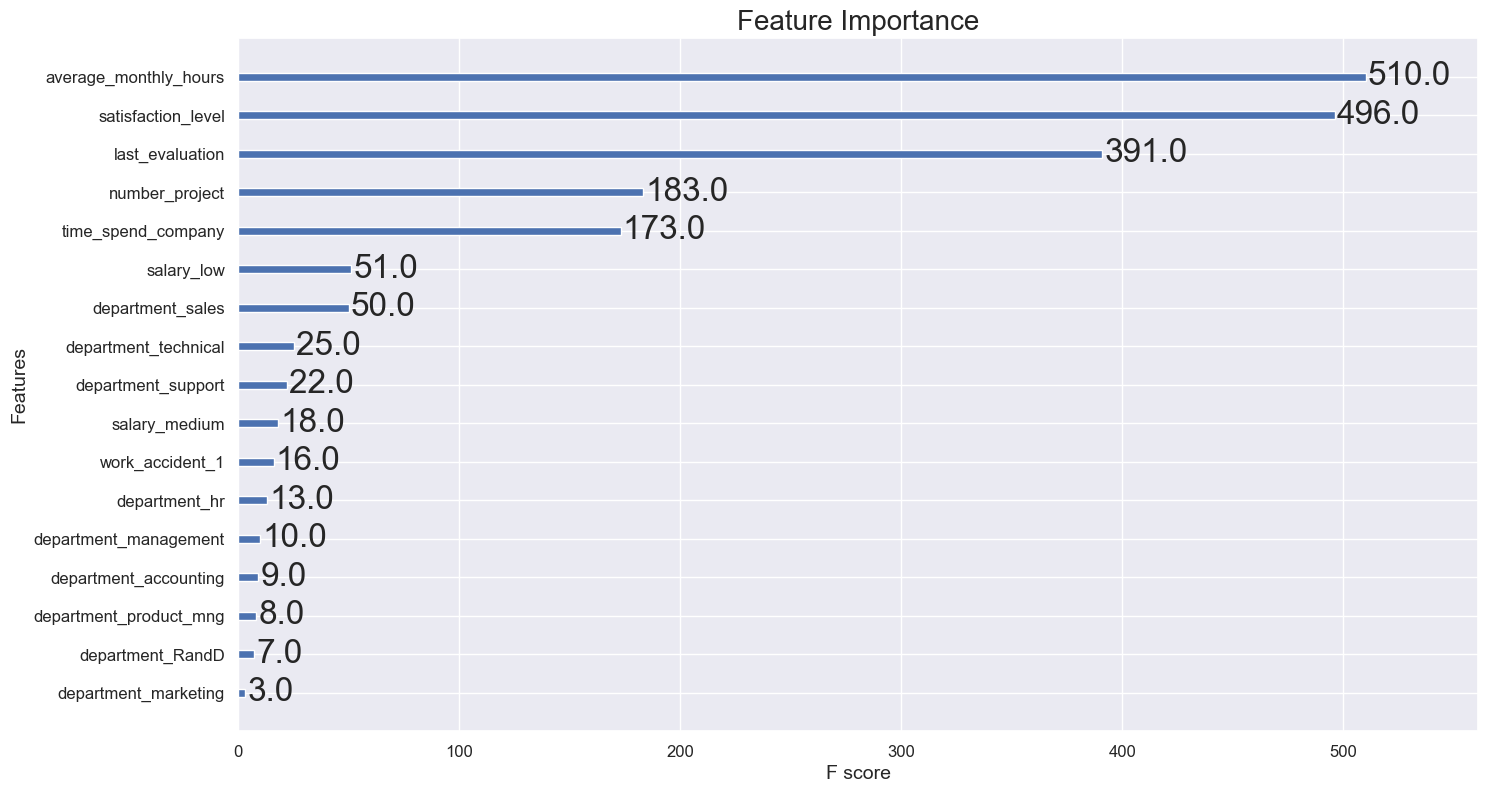

In [91]:
# Feature Importance
plt.figure(figsize=(16,9))
xgb.plot_importance(model, ax=plt.gca())
plt.title("Feature Importance", fontsize=20)
plt.show()

In [92]:
y_pred_test = model.predict(X_test)

In [93]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1998
           1       0.98      0.90      0.94       401

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399



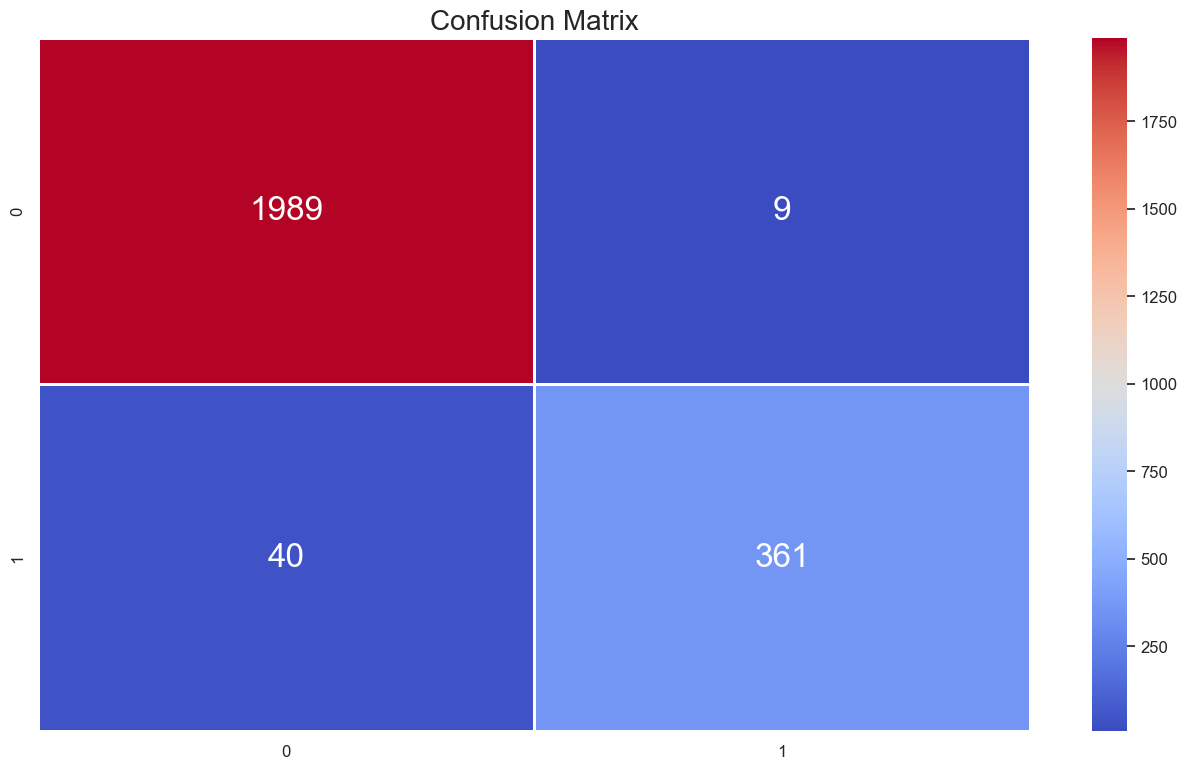

In [94]:
# Confusion Matrix
plt.figure(figsize=(16,9))
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, cmap="coolwarm", fmt='.0f', linewidths=2)
plt.title("Confusion Matrix", fontsize=20)
plt.show()